### To run the cbgt network, see first the technical_testbench to install all the required packages and start the server 

In [1]:
#Auto reloading 
%load_ext autoreload
%autoreload 2
%reload_ext autoreload 

In [2]:
#Removing indentation issues:
#!autopep8 --in-place --aggressive --aggressive init_params.py
#!autopep8 --in-place --aggressive --aggressive popconstruct.py
#!autopep8 --in-place --aggressive --aggressive generateepochs.py
#!autopep8 --in-place --aggressive --aggressive qvalues.py

In [3]:
!python setup.py build_ext --inplace

running build_ext
copying build\lib.win-amd64-3.8\agent_timestep.cp38-win_amd64.pyd -> 


In [4]:
#Importing scripts:
import cbgt as cbgt
from frontendhelpers import * 
from tracetype import *
import init_params as par 
import popconstruct as popconstruct
import qvalues as qval
import generateepochs as gen
from agentmatrixinit import *
#from general_init_codeblocks import *
from agent_timestep import timestep_mutator, multitimestep_mutator
import pdb
import pipeline_creation as pl_creat
import mega_loop as ml

import matplotlib.pyplot as plt

2021-09-28 11:44:05,761	INFO worker.py:800 -- Connecting to existing Ray cluster at address: 192.168.1.208:6379


# Create pipeline

### Network pipeline

In [5]:
seed = np.random.randint(0,9999999)
print(seed)
np.random.seed(seed)
to_check = np.random.randint(0,50,10)
print(to_check)

2306530
[12 19 22 38 45  2 45 21 20 27]


In [6]:
#Create the whole pipeline.
#This pipeline creates three sub-pipelines: 
#rewards pipeline (rsg), q values pipeline (q_val), network pipeline(pl)

pl = pl_creat.create_main_pipeline()
mega_l = ml.mega_loop

# Timestep loop

In [7]:
#Adding the timestep loop to the main pipeline
pl.add(mega_l)

# Running the pipeline

### 1. Default values

In [8]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 
environment = {
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    #'actionchannels' : pd.DataFrame([["left"],["right"]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df':None, #initialized Q-values df (qvalues.py)  
    'n_trials': 5, #number of trials (generateepochs.py)
    'volatility': 2, #frequency of changepoints (generateepochs.py)
    'conflict': 0.7, #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
    'maxstim': 4.0, # 3 instead? how much stimulus the LIP gets at maximum
}


In [9]:
results = cbgt.ExecutionManager(cores=7).run([pl],[environment])

(pid=3044) 2 4 0.161668`
(pid=3044) 3 5 0.161668`
(pid=3044) 10 6 1.0`
(pid=3044) 10 8 1.0`
(pid=3044) 10 10 0.4335`
(pid=3044) 10 11 0.4335`
(pid=3044) 10 12 1.0`
(pid=3044) 10 13 1.0`
(pid=3044) 10 14 1.0`
(pid=3044) 10 15 0.241667`
(pid=3044) 11 7 1.0`
(pid=3044) 11 9 1.0`
(pid=3044) 11 10 0.4335`
(pid=3044) 11 11 0.4335`
(pid=3044) 11 12 1.0`
(pid=3044) 11 13 1.0`
(pid=3044) 11 14 1.0`
(pid=3044) 11 15 0.241667`
(pid=3044) 12 6 1.0`
(pid=3044) 12 8 1.0`
(pid=3044) 12 14 0.8334`
(pid=3044) 13 7 1.0`
(pid=3044) 13 9 1.0`
(pid=3044) 13 14 0.8334`
(pid=3044) 0 12 1.0`
(pid=3044) 1 13 1.0`
(pid=3044) 4 0 1.0`
(pid=3044) 4 2 0.0667`
(pid=3044) 4 4 0.0667`
(pid=3044) 4 5 0.0667`
(pid=3044) 5 1 1.0`
(pid=3044) 5 3 0.0667`
(pid=3044) 5 4 0.0667`
(pid=3044) 5 5 0.0667`
(pid=3044) 6 0 1.0`
(pid=3044) 6 6 0.45`
(pid=3044) 6 8 0.45`
(pid=3044) 7 1 1.0`
(pid=3044) 7 7 0.45`
(pid=3044) 7 9 0.45`
(pid=3044) 8 4 1.0`
(pid=3044) 8 6 0.5`
(pid=3044) 8 8 0.45`
(pid=3044) 9 5 1.0`
(pid=3044) 9 7 0.5`
(

(pid=3044) phasetimer 68
(pid=3044) globaltimer 624
(pid=3044) gateFRs [100.   0.]
(pid=3044) thresholds_crossed [0]
(pid=3044) phasetimer 101
(pid=3044) globaltimer 725
(pid=3044)   action
(pid=3044) 0   left
(pid=3044) 1  right
(pid=3044) chosen_action left
(pid=3044) phasetimer 65
(pid=3044) globaltimer 891
(pid=3044) gateFRs [  0. 100.]
(pid=3044) thresholds_crossed [1]
(pid=3044) phasetimer 101
(pid=3044) globaltimer 992
(pid=3044)   action
(pid=3044) 0   left
(pid=3044) 1  right
(pid=3044) chosen_action right
(pid=3044) phasetimer 69
(pid=3044) globaltimer 1162
(pid=3044) gateFRs [  0. 100.]
(pid=3044) thresholds_crossed [1]
(pid=3044) phasetimer 101
(pid=3044) globaltimer 1263
(pid=3044)   action
(pid=3044) 0   left
(pid=3044) 1  right
(pid=3044) chosen_action right


In [10]:
results[0].keys()

dict_keys(['params', 'pops', 'receps', 'base', 'dpmns', 'd1', 'd2', 'channels', 'newpathways', 'Q_support_params', 'Q_df', 'n_trials', 'volatility', 'conflict', 'reward_mu', 'reward_std', 'maxstim', 'actionchannels', 'volatile_pattern', 'cp_idx', 'cp_indicator', 'noisy_pattern', 't_epochs', 'trial_num', 'chosen_action', 'celldefaults', 'popspecific', 'receptordefaults', 'basestim', 'dpmndefaults', 'd1defaults', 'd2defaults', 'popdata', 'pathways', 'connectivity_AMPA', 'meaneff_AMPA', 'plastic_AMPA', 'connectivity_GABA', 'meaneff_GABA', 'plastic_GABA', 'connectivity_NMDA', 'meaneff_NMDA', 'plastic_NMDA', 'AMPA_con', 'AMPA_eff', 'GABA_con', 'GABA_eff', 'NMDA_con', 'NMDA_eff', 'agent', 'datatables', 'reward_val', 'popfreqs'])

In [11]:
cbgt.saveResults(results,'test',['popfreqs','popdata'])

In [12]:
results[0]['popfreqs']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Time (ms)
0,500.0,500.0,52.533333,49.866667,720.266667,739.866667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
1,500.0,500.0,52.400000,50.400000,725.200000,741.733333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
2,500.0,500.0,53.066667,51.066667,729.066667,743.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2
3,500.0,500.0,54.266667,49.066667,723.066667,739.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3
4,500.0,500.0,54.000000,49.066667,729.066667,738.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,500.0,500.0,59.466667,58.933333,769.066667,734.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.053763,1262
1263,500.0,600.0,59.066667,59.200000,757.466667,729.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,14.516129,1263
1264,500.0,600.0,58.400000,59.333333,772.800000,739.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,14.516129,1264
1265,500.0,500.0,57.466667,59.600000,770.800000,739.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,15.053763,1265


In [13]:
savedresults = cbgt.loadResults('test')
savedresults[0]['popfreqs']

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,Time (ms)
0,500.0,500.0,52.533333,49.866667,720.266667,739.866667,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0
1,500.0,500.0,52.400000,50.400000,725.200000,741.733333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
2,500.0,500.0,53.066667,51.066667,729.066667,743.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,2
3,500.0,500.0,54.266667,49.066667,723.066667,739.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,3
4,500.0,500.0,54.000000,49.066667,729.066667,738.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1262,500.0,500.0,59.466667,58.933333,769.066667,734.533333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.053763,1262
1263,500.0,600.0,59.066667,59.200000,757.466667,729.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,14.516129,1263
1264,500.0,600.0,58.400000,59.333333,772.800000,739.600000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,14.516129,1264
1265,500.0,500.0,57.466667,59.600000,770.800000,739.200000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,15.053763,1265


In [15]:
t_epochs = cbgt.collateVariable(results,'t_epochs')
t_epochs

[       left  right
 0  1.126160    0.0
 1  0.817874    0.0
 2  1.022786    0.0
 3  1.027852    0.0
 4  0.976007    0.0,
        left     right
 0  1.032509  0.000000
 1  1.013095  0.000000
 2  0.856258  0.000000
 3  1.094984  0.000000
 4  0.000000  1.033187]

In [16]:
# LLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRRRRRRRLLLLLLLLLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRR

# LLLRLLLRLLLRRLLLLLRRRRRRLLRRRRLLRRRLRRRRLLLLLRLLRLLLLLRLLLLRLLLLLRRRRRRRRRRRRRRRRR

# LLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRRRRRRRLLLLLLLLLLLLLLLLLLLLLLLLLRRRRRRRRRRRRRRRRR

In [18]:
Q_df = cbgt.collateVariable(results,'Q_df')
Q_df[0]

,left,right
0,0.500000,0.500000
0,0.500000,0.275000
0,0.643043,0.275000
0,0.643043,0.151250
0,0.816207,0.151250
0,0.816207,0.083187


In [19]:
datatables = cbgt.collateVariable(results,'datatables')

In [20]:
datatables[0]

,decision,stimulusstarttime,decisiontime,decisionduration,decisiondurationplusdelay,rewardtime,correctdecision,reward
0,1,0,81,81,182,182,None,0.0
1,0,283,345,62,163,446,None,1.0
2,1,547,589,42,143,690,None,0.0
3,0,791,796,5,106,897,None,1.0
4,1,998,1064,66,167,1165,None,0.0


In [21]:
cbgt.comparisonTable(results, ['n_trials','volatility','conflict'])

,n_trials,volatility,conflict
0,5,2,0.7
1,5,2,0.7


In [22]:
popfreqs = cbgt.collateVariable(results,'popfreqs')

In [23]:
popdata = cbgt.collateVariable(results,'popdata')

In [24]:
popdata[0][popdata[0]['name'] == 'LIP']['column']

10    10
11    11
Name: column, dtype: int64

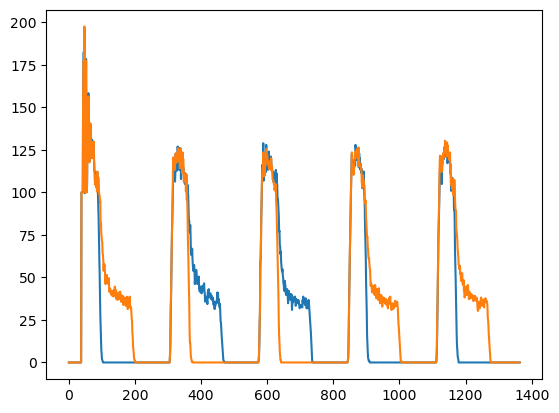

In [26]:
plt.plot(popfreqs[1].iloc[:,10])
plt.plot(popfreqs[1].iloc[:,11])
plt.show()

### 2. Modifying default values 

### 2.1 Modifying values 

In [ ]:
environment = {
    'params': pd.DataFrame([[8, 30]], columns=['N', 'C']),
    'pops' : {'FSI': {'Taum': [60]}}, 
    'receps' : pd.DataFrame([[100, 100]], columns=['Tau_AMPA', 'Tau_GABA']), 
    'base' : {'FSI': {'FreqExt_AMPA': [100]}}, 
    'dpmns' : pd.DataFrame([[400, 100]], columns=['dpmn_wmax', 'dpmn_tauDOP']),
    'd1' : pd.DataFrame([[3, 50]], columns=['dpmn_type', 'dpmn_c']),
    'd2' : pd.DataFrame([[3, 50]], columns=['dpmn_type', 'dpmn_c']),
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), 
    'newpathways' : pd.DataFrame([['LIP', 'D1STR', 'AMPA', 'syn', 700, 0.027]], columns=['src', 'dest', 'receptor', 'type', 'con', 'eff']), 
    'Q_support_params': None,
    'Q_df':None,
    'n_trials': 5,
    'volatility': 2,
    'conflict': 0.7,
    'reward_mu': 1,
    'reward_std': 0.1,
}
results = cbgt.ExecutionManager(cores=7).run(pl,environment) 

In [ ]:
results['popdata']

In [ ]:
results['Q_df']

### 2.2 Modifying a subset of values

In [ ]:
environment = {
    'params': pd.DataFrame([[4, 1]], columns=['N', 'C']), 
    'pops': None,
    'receps' : None, 
    'base' : None,
    'dpmns' : None,
    'd1' : None,
    'd2' : None,
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), 
    'newpathways' : None, 
    'Q_support_params': None,
    'Q_df':None,
    'n_trials': 5,
    'volatility': 2,
    'conflict': 0.7,
    'reward_mu': 1,
    'reward_std': 0.1,
}

results = cbgt.ExecutionManager(cores=7).run(pl,environment) 

In [ ]:
results['popdata']

In [ ]:
results['Q_df']

### 3. Back to default values 

In [ ]:
#See init_params.py / generateepochs.py / popconstruct.py / qvalues.py
#to know the parameters contained in each of the following variables 
environment = {
    'params': None, #neuron parameters (init_params.py)
    'pops': None,   #population parameters (init_params.py)
    'receps' : None, #receptor parameters (init_params.py)
    'base' : None, #baseline stimulation parameters (init_params.py)
    'dpmns' : None, #dopamine related parameters (init_params.py)
    'd1' : None, #D1-MSNs population related parameters (init_params.py)
    'd2' : None, #D2-MSNs population related parameters (init_params.py)
    'channels' : pd.DataFrame([["left"],["right"]], columns=['action']), #action channels related parameters (init_params.py)
    #'actionchannels' : pd.DataFrame([[1],[2]], columns=['action']), #labels for the actions (init_params.py)
    'newpathways' : None, #connectivity parameters (popconstruct.py)
    'Q_support_params': None, #initialization of Q-values update (qvalues.py) 
    'Q_df':None, #initialized Q-values df (qvalues.py)  
    'n_trials': 5, #number of trials (generateepochs.py)
    'volatility': 2, #frequency of changepoints (generateepochs.py)
    'conflict': 0.7, #probability of the preferred choice (generateepochs.py)
    'reward_mu': 1, #mean for the magnitude of the reward (generateepochs.py)
    'reward_std': 0.1, #std for the magnitude of the reward (generateepochs.py)
}
results = cbgt.ExecutionManager(cores=7).run(pl,environment) 

In [ ]:
results['popdata']

In [ ]:
results['Q_df']

In [ ]:
#?

In [ ]:
dev = cbgt.Pipeline()

In [ ]:
dev.add(codeblock_agent_phase0)

In [ ]:
output = cbgt.ExecutionManager(cores=7).run(dev,results) 